<a href="https://colab.research.google.com/github/SanjayKOh/ML-Blinder-Oaxaca-Decomposition/blob/main/BlinderOaxacaResearchProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xgboost as xgb
import pandas as pd


Analysis_df = pd.read_feather('/content/Analysis_df.feather')



In [ ]:
import IPython

js = """
function ClickConnect(){
  const connectButton = document.querySelector("colab-connect-button");
  if(connectButton){
    console.log("Clicked on connect button");
    connectButton.click();
  } else {
    console.log("Already connected or button not found");
  }
}
// Run every 60 seconds
setInterval(ClickConnect, 60000);

"""
display(IPython.display.Javascript(js))


<IPython.core.display.Javascript object>

In [ ]:
print(Analysis_df.columns.tolist())


['WKXPNS', 'INCTOT_MOM', 'INCTOT_POP', 'INCTOT_SP', 'INCWAGE_MOM', 'INCWAGE_POP', 'INCWAGE_SP', 'INCSS_MOM', 'INCSS_POP', 'INCSS_SP', 'YEAR_2021', 'YEAR_2022', 'YEAR_2023', 'YEAR_2024', 'SEX_Female', 'RACE_200', 'RACE_300', 'RACE_651', 'RACE_652', 'RACE_801', 'RACE_802', 'RACE_803', 'RACE_804', 'RACE_805', 'RACE_806', 'RACE_807', 'RACE_808', 'RACE_809', 'RACE_810', 'RACE_811', 'RACE_812', 'RACE_813', 'RACE_814', 'RACE_815', 'RACE_816', 'RACE_817', 'RACE_818', 'RACE_819', 'RACE_820', 'RACE_830', 'ASIAN_20', 'ASIAN_30', 'ASIAN_40', 'ASIAN_50', 'ASIAN_60', 'ASIAN_70', 'ASIAN_99', 'EDUC_10', 'EDUC_20', 'EDUC_30', 'EDUC_40', 'EDUC_50', 'EDUC_60', 'EDUC_71', 'EDUC_73', 'EDUC_81', 'EDUC_91', 'EDUC_92', 'EDUC_111', 'EDUC_123', 'EDUC_124', 'EDUC_125', 'EDUC99_4', 'EDUC99_5', 'EDUC99_6', 'EDUC99_7', 'EDUC99_8', 'EDUC99_9', 'EDUC99_10', 'EDUC99_11', 'EDUC99_13', 'EDUC99_14', 'EDUC99_15', 'EDUC99_16', 'EDUC99_17', 'EDUC99_18', 'SCHLCOLL_1', 'SCHLCOLL_2', 'SCHLCOLL_3', 'SCHLCOLL_4', 'SCHLCOLL_5', '

In [ ]:
DF_female = Analysis_df[Analysis_df['SEX_Female'] == 1]
DF_male = Analysis_df[Analysis_df['SEX_Female'] == 0]

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

y_m = DF_male['log_INCWAGE'].values
X_m = DF_male.drop(columns=['log_INCWAGE'])

y_f = DF_female['log_INCWAGE'].values
X_f = DF_female.drop(columns=['log_INCWAGE'])
# Split each by train/test
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, test_size=0.2, random_state=1)
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y_f, test_size=0.2, random_state=1)


In [ ]:
print(X_m['INCWAGE_SP'].mean)

<bound method Series.mean of 1         52500.0
2             0.0
4             0.0
5             0.0
7         42000.0
           ...   
345753        0.0
345754        0.0
345756        0.0
345758    13000.0
345760    50000.0
Name: INCWAGE_SP, Length: 177645, dtype: float64>


In [ ]:



params = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'device' : 'cuda',
    'learning_rate': 0.01,
    'max_depth': 30,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_lambda': 10000,
    'reg_alpha': 1,
    'eval_metric': 'rmse',


}

evals_result = {}

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=50000,              # ← reduced from 80000
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=200,          # ← still quite patient
    evals_result=evals_result,
    verbose_eval= 1000                     # ← cleaner logging
)



[0]	train-rmse:0.91170	test-rmse:0.91454
[1000]	train-rmse:0.55476	test-rmse:0.56791
[2000]	train-rmse:0.53034	test-rmse:0.55038
[3000]	train-rmse:0.51810	test-rmse:0.54432
[4000]	train-rmse:0.50864	test-rmse:0.54091
[5000]	train-rmse:0.50059	test-rmse:0.53879
[6000]	train-rmse:0.49336	test-rmse:0.53735
[7000]	train-rmse:0.48671	test-rmse:0.53630
[8000]	train-rmse:0.48050	test-rmse:0.53554
[9000]	train-rmse:0.47460	test-rmse:0.53494
[10000]	train-rmse:0.46895	test-rmse:0.53447
[11000]	train-rmse:0.46358	test-rmse:0.53409
[12000]	train-rmse:0.45832	test-rmse:0.53379
[13000]	train-rmse:0.45329	test-rmse:0.53356
[14000]	train-rmse:0.44843	test-rmse:0.53335
[15000]	train-rmse:0.44371	test-rmse:0.53319
[16000]	train-rmse:0.43911	test-rmse:0.53304
[17000]	train-rmse:0.43457	test-rmse:0.53295
[18000]	train-rmse:0.43021	test-rmse:0.53289
[19000]	train-rmse:0.42592	test-rmse:0.53282
[20000]	train-rmse:0.42175	test-rmse:0.53277
[20056]	train-rmse:0.42152	test-rmse:0.53277


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_m = StandardScaler().fit(X_m_train)
scaler_f = StandardScaler().fit(X_f_train)

In [ ]:


import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.model_selection import RandomizedSearchCV
import pickle

explained_diff = []
unexplained_diff = []


param_m = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'device' : 'cuda',
    'learning_rate': 0.05,
    'max_depth': 7,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_lambda': 10,
    'reg_alpha': 0,
    'eval_metric': 'rmse',

}

param_f = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'device': 'cuda',
    'learning_rate': 0.01,
    'max_depth': 12,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_lambda': 80,
    'reg_alpha': 1,
    'eval_metric': 'rmse',


}



for i in range(30):
    print(i)
    Male_DF_bootstrapped = DF_male.sample(frac = 1, replace = True, random_state = i )
    Female_DF_bootstrapped = DF_female.sample(frac = 1, replace = True, random_state = i)
    X_m_boot = scaler_m.transform(Male_DF_bootstrapped.drop(columns = 'log_INCWAGE'))
    y_m_boot = Male_DF_bootstrapped['log_INCWAGE']
    # Features and target for females
    X_f_boot = scaler_f.transform(Female_DF_bootstrapped.drop(columns='log_INCWAGE'))
    y_f_boot = Female_DF_bootstrapped['log_INCWAGE']

    X_m_train_boot, X_m_val_boot, y_m_train_boot, y_m_val_boot = train_test_split(
    X_m_boot, y_m_boot, test_size=0.2, random_state=i)

    X_f_train_boot, X_f_val_boot, y_f_train_boot, y_f_val_boot = train_test_split(
    X_f_boot, y_f_boot, test_size=0.2, random_state=i)



    # Train male model
    dtrain_m = xgb.DMatrix(X_m_train_boot, label=y_m_train_boot)
    dval_m = xgb.DMatrix(X_m_val_boot, label=y_m_val_boot)
    model_m = xgb.train(dtrain = dtrain_m, params=param_m, num_boost_round=5000, early_stopping_rounds=200, evals =[(dval_m,'val')], verbose_eval=False)

    # Train female model
    dtrain_f = xgb.DMatrix(X_f_train_boot, label=y_f_train_boot)
    dval_f = xgb.DMatrix(X_f_val_boot, label = y_f_val_boot)
    model_f = xgb.train(dtrain = dtrain_f, params=param_f, num_boost_round=20000, early_stopping_rounds=200, evals =[(dval_f,'val')], verbose_eval=False)

    # Predictions
    male_pred_on_male = model_m.predict(xgb.DMatrix(X_m_boot))  # fitted male values
    female_pred_on_female = model_f.predict(xgb.DMatrix(X_f_boot))  # fitted female values
    male_pred_on_female = model_m.predict(xgb.DMatrix(scaler_m.transform(Female_DF_bootstrapped.drop(columns='log_INCWAGE'))))  # counterfactual

    # Explained: male structure applied to males minus male structure applied to females
    explained = np.mean(male_pred_on_male) - np.mean(male_pred_on_female)

    # Unexplained: male structure applied to females minus female fitted values
    unexplained = np.mean(male_pred_on_female) - np.mean(female_pred_on_female)

    # Store results
    explained_diff.append(explained)
    unexplained_diff.append(unexplained)








0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [ ]:
import numpy as np
print(f"Mean Explained Difference: {np.mean(explained_diff):.4f}")
print(f"Standard Error for Mean Explained Difference: {np.sqrt(np.var(explained_diff)):.4f}")

print(f"Mean Unexplained Difference: {np.mean(unexplained_diff):.4f}")
print(f"Standard Error for Mean Unexplained Difference: {np.sqrt(np.var(unexplained_diff)):.4f}")

Mean Explained Difference: 0.1179
Standard Error for Mean Explained Difference: 0.0041
Mean Unexplained Difference: 0.1696
Standard Error for Mean Unexplained Difference: 0.0039


In [ ]:
print(len(explained_diff))


30


In [ ]:
print(explained_diff)
print(unexplained_diff)

[np.float32(0.12093544), np.float32(0.11765957), np.float32(0.11531067), np.float32(0.11963844), np.float32(0.11535263), np.float32(0.12454033), np.float32(0.12167168), np.float32(0.11586666), np.float32(0.11369324), np.float32(0.112210274), np.float32(0.12228489), np.float32(0.10829449), np.float32(0.1196785), np.float32(0.11424255), np.float32(0.12113857), np.float32(0.11684799), np.float32(0.11376858), np.float32(0.116456985), np.float32(0.12017155), np.float32(0.12283707), np.float32(0.113194466), np.float32(0.11577797), np.float32(0.11772728), np.float32(0.12683582), np.float32(0.11649799), np.float32(0.11964512), np.float32(0.117321014), np.float32(0.12506294), np.float32(0.11334705), np.float32(0.11774826)]
[np.float32(0.16587925), np.float32(0.16918278), np.float32(0.172719), np.float32(0.16779613), np.float32(0.17121887), np.float32(0.16710663), np.float32(0.16615677), np.float32(0.175457), np.float32(0.17841625), np.float32(0.17255592), np.float32(0.16936016), np.float32(0.17

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import RandomizedSearchCV

In [ ]:

# Male dataset
X_m_train_scaled = pd.DataFrame(scaler_m.transform(X_m_train), columns=X_m_train.columns, index=X_m_train.index)
X_m_test_scaled = pd.DataFrame(scaler_m.transform(X_m_test), columns=X_m_test.columns, index=X_m_test.index)

# Female dataset
X_f_train_scaled = pd.DataFrame(scaler_f.transform(X_f_train), columns=X_f_train.columns, index=X_f_train.index)
X_f_test_scaled = pd.DataFrame(scaler_f.transform(X_f_test), columns=X_f_test.columns, index=X_f_test.index)

y_m_test = y_m_test.reshape(-1, 1)
y_f_test = y_f_test.reshape(-1, 1)


In [ ]:
dtrainm = xgb.DMatrix(X_m_train_scaled, label=y_m_train)
dtestm = xgb.DMatrix(X_m_test_scaled, label=y_m_test)

In [ ]:
param_m = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'device' : 'cuda',
    'learning_rate': 0.05,
    'max_depth': 7,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_lambda': 10,
    'reg_alpha': 0,
    'eval_metric': 'rmse',

}

model_m = xgb.train(
    params=param_m,
    dtrain=dtrainm,
    num_boost_round=5000,              # ← reduced from 80000
    evals=[(dtrainm, 'train'), (dtestm, 'test')],
    early_stopping_rounds=200,          # ← still quite patient
    verbose_eval=1000                     # ← cleaner logging
)




[0]	train-rmse:0.87635	test-rmse:0.87662
[1000]	train-rmse:0.47095	test-rmse:0.50737
[2000]	train-rmse:0.44279	test-rmse:0.50153
[3000]	train-rmse:0.41954	test-rmse:0.49943
[4000]	train-rmse:0.39910	test-rmse:0.49863
[4458]	train-rmse:0.39061	test-rmse:0.49857


In [ ]:
dtrainf = xgb.DMatrix(X_f_train_scaled, label=y_f_train)
dtestf = xgb.DMatrix(X_f_test_scaled, label=y_f_test)

In [ ]:
param_f = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'device': 'cuda',
    'learning_rate': 0.01,
    'max_depth': 12,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_lambda': 80,
    'reg_alpha': 1,
    'eval_metric': 'rmse',


}

evals_result = {}

model_f = xgb.train(
    params=param_f,
    dtrain=dtrainf,
    num_boost_round=20000,              # ← reduced from 80000
    evals=[(dtrainf, 'train'), (dtestf, 'test')],
    early_stopping_rounds=200,          # ← still quite patient
    evals_result=evals_result,
    verbose_eval= 1000                     # ← cleaner logging
)


[0]	train-rmse:0.91002	test-rmse:0.91290
[1000]	train-rmse:0.51650	test-rmse:0.55023
[2000]	train-rmse:0.49544	test-rmse:0.54012
[3000]	train-rmse:0.48123	test-rmse:0.53572
[4000]	train-rmse:0.46909	test-rmse:0.53308
[5000]	train-rmse:0.45765	test-rmse:0.53147
[6000]	train-rmse:0.44645	test-rmse:0.53045
[7000]	train-rmse:0.43574	test-rmse:0.52985
[8000]	train-rmse:0.42550	test-rmse:0.52949
[9000]	train-rmse:0.41548	test-rmse:0.52924
[10000]	train-rmse:0.40517	test-rmse:0.52909
[10549]	train-rmse:0.39977	test-rmse:0.52909


In [ ]:




cf_f = model_m.predict(xgb.DMatrix(pd.DataFrame(scaler_m.transform(X_f),columns=X_f.columns,index = X_f.index )))
f_pred = model_f.predict(xgb.DMatrix(pd.DataFrame(scaler_f.transform(X_f),columns=X_f.columns,index = X_f.index )))
gap = np.mean(cf_f) - np.mean(f_pred)
print(gap)

0.16544724


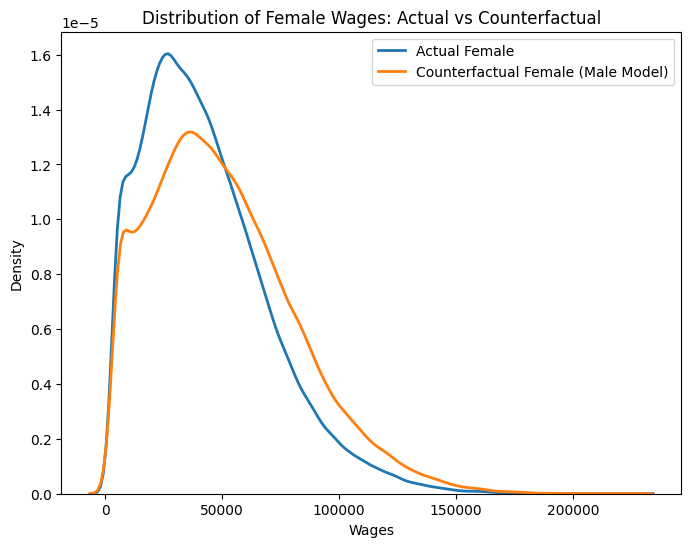

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,6))
sns.kdeplot(np.exp(f_pred), label="Actual Female", lw=2)
sns.kdeplot(np.exp(cf_f), label="Counterfactual Female (Male Model)", lw=2)
plt.title("Distribution of Female Wages: Actual vs Counterfactual")
plt.xlabel("Wages")
plt.ylabel("Density")
plt.legend()
plt.show()


In [ ]:
deciles = np.linspace(0.1, 0.9, 9)
actual_q = np.quantile(np.exp(f_pred), deciles)
cf_q = np.quantile(np.exp(cf_f), deciles)
gap = cf_q - actual_q


decile_df = pd.DataFrame({"Decile": deciles, "Female Fitted predictions": actual_q, "Counterfactual": cf_q, "Gap": gap})
print(decile_df)


   Decile  Female Fitted predictions  Counterfactual           Gap
0     0.1               11468.887695    13133.849023   1664.961328
1     0.2               19289.593750    22941.492578   3651.898828
2     0.3               25723.142969    31226.919922   5503.776953
3     0.4               31989.632813    38790.417969   6800.785156
4     0.5               38579.867188    46583.351562   8003.484375
5     0.6               45664.357031    54948.800000   9284.442969
6     0.7               53834.105469    64348.295313  10514.189844
7     0.8               63965.620313    75807.346875  11841.726563
8     0.9               79516.028125    92722.450000  13206.421875


/tmp/ipython-input-1837000946.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unexplained_df.head(topk), x="Unexplained_Gap", y="Feature", palette="coolwarm")


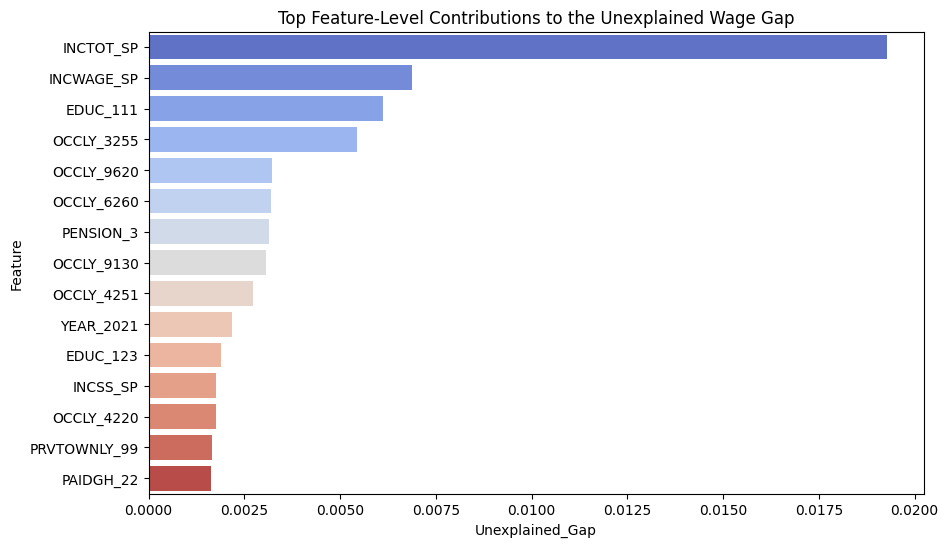

In [ ]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# --- Male model ---
explainer_m = shap.TreeExplainer(model_m)
X_m_scaled = pd.DataFrame(scaler_m.transform(X_m), columns=X_m.columns, index=X_m.index)
shap_m_on_m = explainer_m(X_m_scaled)

# Male model on female data
X_f_scaled = pd.DataFrame(scaler_m.transform(X_f), columns=X_f.columns, index=X_f.index)
shap_m_on_f = explainer_m(X_f_scaled)

# --- Female model ---
explainer_f = shap.TreeExplainer(model_f)
X_f_scaled_f = pd.DataFrame(scaler_f.transform(X_f), columns=X_f.columns, index=X_f.index)
shap_f_on_f = explainer_f(X_f_scaled_f)

# --- Explained (characteristics) ---
# Difference between male & female data under the same model
mean_shap_m = shap_m_on_m.values.mean(axis=0)
mean_shap_f_mmodel = shap_m_on_f.values.mean(axis=0)
explained_gap = mean_shap_f_mmodel - mean_shap_m

# --- Unexplained (returns) ---
# Difference between models on the same (female) data
mean_shap_f_fmodel = shap_f_on_f.values.mean(axis=0)
unexplained_gap = mean_shap_f_mmodel - mean_shap_f_fmodel

# --- Put into dataframes ---
feature_names = X_m.columns  # shared columns
explained_df = pd.DataFrame({
    "Feature": feature_names,
    "Male_mean": mean_shap_m,
    "Female_mean_maleModel": mean_shap_f_mmodel,
    "Explained_Gap": explained_gap
}).sort_values("Explained_Gap", ascending=False)

unexplained_df = pd.DataFrame({
    "Feature": feature_names,
    "MaleModel_on_F": mean_shap_f_mmodel,
    "FemaleModel_on_F": mean_shap_f_fmodel,
    "Unexplained_Gap": unexplained_gap
}).sort_values("Unexplained_Gap", ascending=False)

# --- Visualise unexplained gap ---
topk = 15
plt.figure(figsize=(10,6))
sns.barplot(data=unexplained_df.head(topk), x="Unexplained_Gap", y="Feature", palette="coolwarm")
plt.title("Top Feature-Level Contributions to the Unexplained Wage Gap")
plt.show()


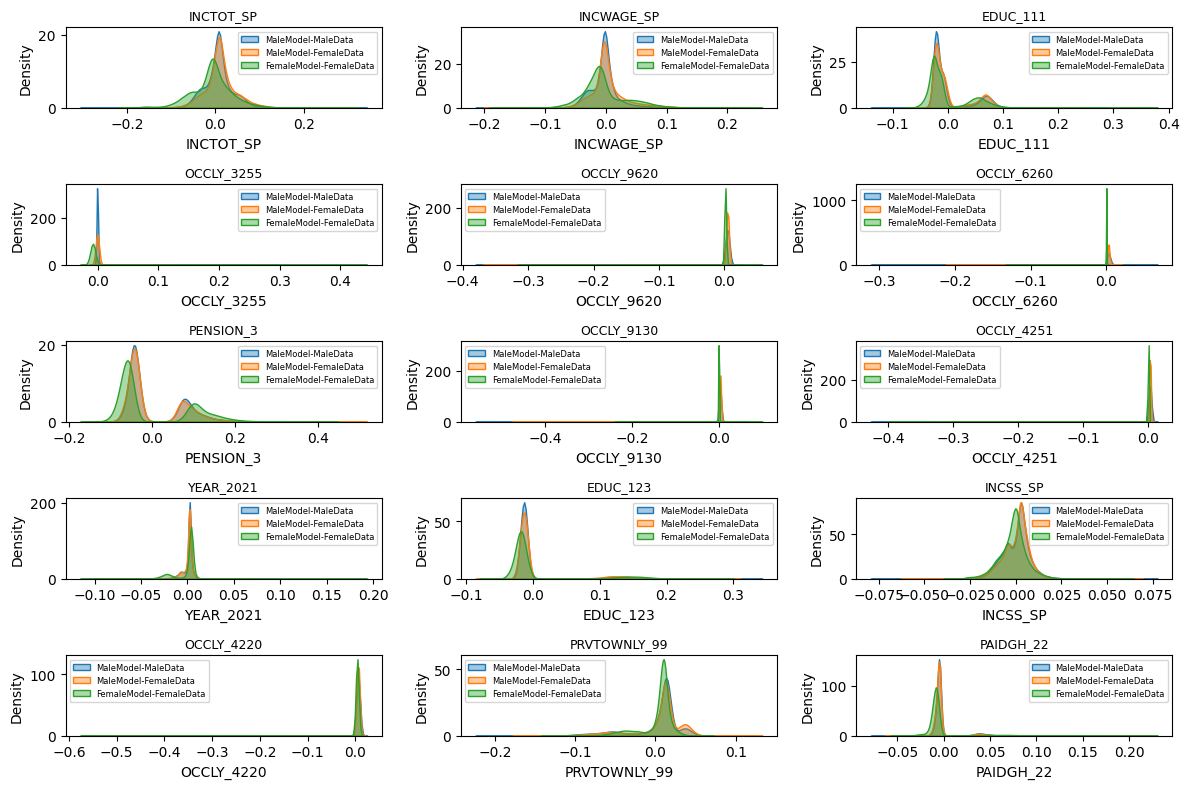

In [ ]:
# --- Step 1: get top-k features from unexplained gap ---
top_features = unexplained_df.head(topk)["Feature"].tolist()

# --- Step 2: subset SHAP values for those features ---
# SHAP values already computed: shap_m_on_m, shap_m_on_f, shap_f_on_f
shap_values_maleModel_on_male = pd.DataFrame(
    shap_m_on_m.values, columns=feature_names, index=X_m.index
)[top_features]

shap_values_maleModel_on_female = pd.DataFrame(
    shap_m_on_f.values, columns=feature_names, index=X_f.index
)[top_features]

shap_values_femaleModel_on_female = pd.DataFrame(
    shap_f_on_f.values, columns=feature_names, index=X_f.index
)[top_features]

# --- Step 3: plot distributions (example: violin plots for comparison) ---
plt.figure(figsize=(12, 8))
for i, feat in enumerate(top_features):
    plt.subplot(5, 3, i+1)  # adjust grid if topk != 15
    sns.kdeplot(shap_values_maleModel_on_male[feat], label="MaleModel-MaleData", fill=True, alpha=0.4)
    sns.kdeplot(shap_values_maleModel_on_female[feat], label="MaleModel-FemaleData", fill=True, alpha=0.4)
    sns.kdeplot(shap_values_femaleModel_on_female[feat], label="FemaleModel-FemaleData", fill=True, alpha=0.4)
    plt.title(feat, fontsize=9)
    plt.legend(fontsize=6)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3468169309.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unexplained_df.tail(bottomk), x="Unexplained_Gap", y="Feature", palette="coolwarm")


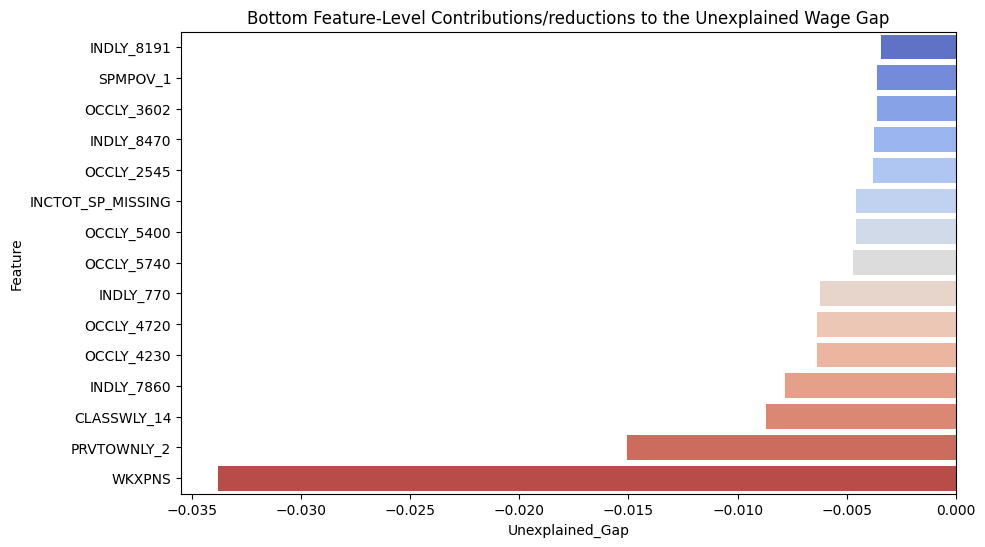

In [ ]:
#Visualising features that potentially reduced the unexplained gap

# --- Visualise unexplained gap ---
bottomk = 15
plt.figure(figsize=(10,6))
sns.barplot(data=unexplained_df.tail(bottomk), x="Unexplained_Gap", y="Feature", palette="coolwarm")
plt.title("Bottom Feature-Level Contributions/reductions to the Unexplained Wage Gap")
plt.show()


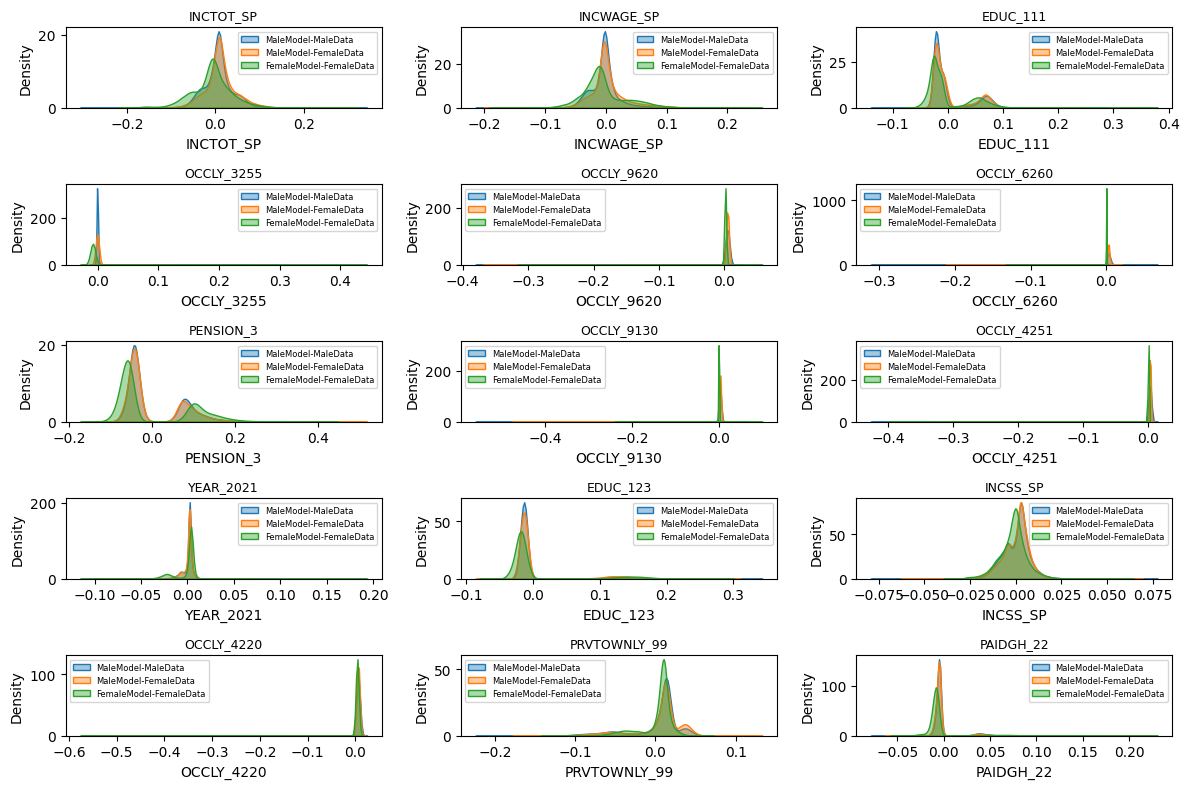

In [ ]:
# --- Step 1: get top-k features from unexplained gap ---
bottom_features = unexplained_df.head(bottomk)["Feature"].tolist()

# --- Step 2: subset SHAP values for those features ---
# SHAP values already computed: shap_m_on_m, shap_m_on_f, shap_f_on_f
shap_values_maleModel_on_male = pd.DataFrame(
    shap_m_on_m.values, columns=feature_names, index=X_m.index
)[bottom_features]

shap_values_maleModel_on_female = pd.DataFrame(
    shap_m_on_f.values, columns=feature_names, index=X_f.index
)[bottom_features]

shap_values_femaleModel_on_female = pd.DataFrame(
    shap_f_on_f.values, columns=feature_names, index=X_f.index
)[bottom_features]

# --- Step 3: plot distributions (example: violin plots for comparison) ---
plt.figure(figsize=(12, 8))
for i, feat in enumerate(bottom_features):
    plt.subplot(5, 3, i+1)  # adjust grid if topk != 15
    sns.kdeplot(shap_values_maleModel_on_male[feat], label="MaleModel-MaleData", fill=True, alpha=0.4)
    sns.kdeplot(shap_values_maleModel_on_female[feat], label="MaleModel-FemaleData", fill=True, alpha=0.4)
    sns.kdeplot(shap_values_femaleModel_on_female[feat], label="FemaleModel-FemaleData", fill=True, alpha=0.4)
    plt.title(feat, fontsize=9)
    plt.legend(fontsize=6)
plt.tight_layout()
plt.show()

In [ ]:
summary_df = pd.DataFrame({
    "Feature": top_features,
    "MaleModel_on_Male": shap_values_maleModel_on_male.mean(),
    "MaleModel_on_Female": shap_values_maleModel_on_female.mean(),
    "FemaleModel_on_Female": shap_values_femaleModel_on_female.mean(),
})

print(summary_df)

                   Feature  MaleModel_on_Male  MaleModel_on_Female  \
INCTOT_SP        INCTOT_SP           0.005929             0.010992   
INCWAGE_SP      INCWAGE_SP          -0.002661             0.003611   
EDUC_111          EDUC_111           0.001564             0.004144   
OCCLY_3255      OCCLY_3255          -0.000076             0.005547   
OCCLY_9620      OCCLY_9620           0.000130             0.003330   
OCCLY_6260      OCCLY_6260           0.000764             0.003209   
PENSION_3        PENSION_3           0.004679             0.004079   
OCCLY_9130      OCCLY_9130          -0.000483             0.003076   
OCCLY_4251      OCCLY_4251           0.000460             0.002737   
YEAR_2021        YEAR_2021           0.000299             0.000259   
EDUC_123          EDUC_123          -0.001303             0.004020   
INCSS_SP          INCSS_SP           0.000020             0.000224   
OCCLY_4220      OCCLY_4220           0.000029             0.002127   
PRVTOWNLY_99  PRVTOW

In [ ]:
X_f = DF_female[DF_female["EDUC_111"] == 1]

# --- Step 1: Extract dummy columns ---
occ_cols = [c for c in X_f.columns if c.startswith("OCCLY_")]
ind_cols = [c for c in X_f.columns if c.startswith("INDLY_")]
clw_cols = [c for c in X_f.columns if c.startswith("CLASSWLY_")]
Un_cols = [c for c in X_f.columns if c.startswith("UNION_")]
# --- Step 2: Reconstruct categories ---
occ = X_f[occ_cols].idxmax(axis=1).str.replace("OCCLY_", "")
ind = X_f[ind_cols].idxmax(axis=1).str.replace("INDLY_", "")
clw = X_f[clw_cols].idxmax(axis=1).str.replace("CLASSWLY_", "")
union = X_f[Un_cols].idxmax(axis = 1 ).str.replace("UNION_", "")
# --- Step 3: Build tidy dataframe ---
job_char_f = pd.DataFrame({
    "Occupation": occ,
    "Industry": ind,
    "ClassOfWorker": clw,
    "UnionMember":union
}, index=X_f.index)

# --- Step 4: Count frequency ---
occ_counts = job_char_f["Occupation"].value_counts().reset_index()
occ_counts.columns = ["Occupation", "Count"]

ind_counts = job_char_f["Industry"].value_counts().reset_index()
ind_counts.columns = ["Industry", "Count"]

clw_counts = job_char_f["ClassOfWorker"].value_counts().reset_index()
clw_counts.columns = ["ClassOfWorker", "Count"]

Un_counts = job_char_f["UnionMember"].value_counts().reset_index()
Un_counts.columns = ["UnionMember", "Count"]
# --- Step 5: Combined summary (optional) ---
job_summary = (
    job_char_f
    .value_counts()
    .reset_index(name="Count")
    .sort_values("Count", ascending=False)
)

print("Top Occupations for Females:")
print(occ_counts.head(10))

print(f"Top Industries for Females{ind_counts.head(10)}")


print(f"Top Industries for Females{clw_counts.head(10)}")

print(f"Union Membership{Un_counts}")

Top Occupations for Females:
  Occupation  Count
0       3255   4108
1       2310   3037
2        440   1619
3        800   1309
4       5740   1076
5       5240    818
6        120    716
7       2545    710
8         20    707
9        630    701
Top Industries for Females  Industry  Count
0     7860   5571
1     8191   4619
2     7870   1421
3     7380   1158
4     8680   1085
5     8090   1084
6     6870    890
7     8370    856
8     9480    847
9     6991    790
Top Industries for Females  ClassOfWorker  Count
0            22  32498
1            28   4091
2            27   3895
3            14   1733
4            25   1470
5            29     10
Union Membership  UnionMember  Count
0           1  42786
1           2    795
2           3    116


In [ ]:
import re

raw_text = """
    0000 Not in universe 0010 Chief executives 0020 General and operations managers 0040 Advertising and promotions managers 0051 Marketing managers 0052 Sales managers 0060 Public relations and fundraising managers 0101 Administrative services managers 0102 Facilities managers 0110 Computer and information systems managers 0120 Financial managers 0135 Compensation and benefits managers 0136 Human resources managers 0137 Training and development managers 0140 Industrial production managers 0150 Purchasing managers 0160 Transportation, storage, and distribution managers 0205 Farmers, ranchers, and other agricultural managers 0220 Construction managers 0230 Education and childcare administrators 0300 Architectural and engineering managers 0310 Food service managers 0335 Entertainment and recreation managers 0340 Lodging managers 0350 Medical and health services managers 0360 Natural sciences managers 0410 Property, real estate, and community association managers 0420 Social and community service managers 0425 Emergency management directors 0440 Managers, all other 0500 Agents and business managers of artists, performers, and athletes 0510 Buyers and purchasing agents, farm products 0520 Wholesale and retail buyers, except farm products 0530 Purchasing agents, except wholesale, retail, and farm products 0540 Claims adjusters, appraisers, examiners, and investigators 0565 Compliance officers 0600 Cost estimators 0630 Human resources workers 0640 Compensation, benefits, and job analysis specialists 0650 Training and development specialists 0700 Logisticians 0705 Project management specialists 0710 Management analysts 0725 Meeting, convention, and event planners 0726 Fundraisers 0735 Market research analysts and marketing specialists 0750 Business operations specialists, all other 0800 Accountants and auditors 0810 Property appraisers and assessors 0820 Budget analysts 0830 Credit analysts 0845 Financial and investment analysts 0850 Personal financial advisors 0860 Insurance underwriters 0900 Financial examiners 0910 Credit counselors and loan officers 0930 Tax examiners and collectors, and revenue agents 0940 Tax preparers 0960 Other financial specialists 1005 Computer and information research scientists 1006 Computer systems analysts 1007 Information security analysts 1010 Computer programmers 1021 Software developers 1022 Software quality assurance analysts and testers 1031 Web developers 1032 Web and digital interface designers 1050 Computer support specialists 1065 Database administrators and architects 1105 Network and computer systems administrators 1106 Computer network architects 1108 Computer occupations, all other 1200 Actuaries 1220 Operations research analysts 1240 Other mathematical science occupations 1305 Architects, except landscape and naval 1306 Landscape architects 1310 Surveyors, cartographers, and photogrammetrists 1320 Aerospace engineers 1340 Bioengineers and biomedical engineers 1350 Chemical engineers 1360 Civil engineers 1400 Computer hardware engineers 1410 Electrical and electronics engineers 1420 Environmental engineers 1430 Industrial engineers, including health and safety 1440 Marine engineers and naval architects 1450 Materials engineers 1460 Mechanical engineers 1520 Petroleum engineers 1530 Engineers, all other 1541 Architectural and civil drafters 1545 Other drafters 1551 Electrical and electronic engineering technologists and technicians 1555 Other engineering technologists and technicians, except drafters 1560 Surveying and mapping technicians 1600 Agricultural and food scientists 1610 Biological scientists 1640 Conservation scientists and foresters 1650 Medical scientists 1700 Astronomers and physicists 1710 Atmospheric and space scientists 1720 Chemists and materials scientists 1745 Environmental scientists and specialists, including health 1750 Geoscientists and hydrologists, except geographers 1760 Physical scientists, all other 1800 Economists 1821 Clinical and counseling psychologists 1822 School psychologists 1825 Other psychologists 1840 Urban and regional planners 1860 Miscellaneous social scientists and related workers 1900 Agricultural and food science technicians 1910 Biological technicians 1920 Chemical technicians 1935 Environmental science and geoscience technicians 1970 Other life, physical, and social science technicians 1980 Occupational health and safety specialists and technicians 2001 Substance abuse and behavioral disorder counselors 2002 Educational, guidance, and career counselors and advisors 2003 Marriage and family therapists 2004 Mental health counselors 2005 Rehabilitation counselors 2006 Counselors, all other 2011 Child, family, and school social workers 2012 Healthcare social workers 2013 Mental health and substance abuse social workers 2014 Social workers, all other 2015 Probation officers and correctional treatment specialists 2016 Social and human service assistants 2025 Other community and social service specialists 2040 Clergy 2050 Directors, religious activities and education 2060 Religious workers, all other 2100 Lawyers 2105 Judicial law clerks 2145 Paralegals and legal assistants 2170 Title examiners, abstractors, and searchers 2180 Legal support workers, all other 2205 Postsecondary teachers 2300 Preschool and kindergarten teachers 2310 Elementary and middle school teachers 2320 Secondary school teachers 2330 Special education teachers 2350 Tutors 2360 Other teachers and instructors 2400 Archivists, curators, and museum technicians 2435 Librarians and media collections specialists 2440 Library technicians 2545 Teaching assistants 2555 Other educational instruction and library workers 2600 Artists and related workers 2631 Commercial and industrial designers 2632 Fashion designers 2633 Floral designers 2634 Graphic designers 2635 Interior designers 2636 Merchandise displayers and window trimmers 2640 Other designers 2700 Actors 2710 Producers and directors 2721 Athletes and sports competitors 2722 Coaches and scouts 2723 Umpires, referees, and other sports officials 2740 Dancers and choreographers 2751 Music directors and composers 2752 Musicians and singers 2755 Disc jockeys, except radio 2770 Entertainers and performers, sports and related workers, all other 2805 Broadcast announcers and radio disc jockeys 2810 News analysts, reporters, and journalists 2825 Public relations specialists 2830 Editors 2840 Technical writers 2850 Writers and authors 2861 Interpreters and translators 2862 Court reporters and simultaneous captioners 2865 Media and communication workers, all other 2905 Broadcast, sound, and lighting technicians 2910 Photographers 2920 Television, video, and film camera operators and editors 3000 Chiropractors 3010 Dentists 3030 Dietitians and nutritionists 3040 Optometrists 3050 Pharmacists 3090 Other physicians 3100 Surgeons 3110 Physician assistants 3120 Podiatrists 3140 Audiologists 3150 Occupational therapists 3160 Physical therapists 3200 Radiation therapists 3210 Recreational therapists 3220 Respiratory therapists 3230 Speech-language pathologists 3245 Therapists, all other 3250 Veterinarians 3255 Registered nurses 3256 Nurse anesthetists 3258 Nurse practitioners 3261 Acupuncturists 3270 Healthcare diagnosing or treating practitioners, all other 3300 Clinical laboratory technologists and technicians 3310 Dental hygienists 3321 Cardiovascular technologists and technicians 3322 Diagnostic medical sonographers 3323 Radiologic technologists and technicians 3324 Magnetic resonance imaging technologists 3330 Nuclear medicine technologists and medical dosimetrists 3401 Emergency medical technicians 3402 Paramedics 3421 Pharmacy technicians 3422 Psychiatric technicians 3423 Surgical technologists 3424 Veterinary technologists and technicians 3430 Dietetic technicians and ophthalmic medical technicians 3500 Licensed practical and licensed vocational nurses 3515 Medical records specialists 3520 Opticians, dispensing 3545 Miscellaneous health technologists and technicians 3550 Other healthcare practitioners and technical occupations 3601 Home health aides 3602 Personal care aides 3603 Nursing assistants 3605 Orderlies and psychiatric aides 3610 Occupational therapy assistants and aides 3620 Physical therapist assistants and aides 3630 Massage therapists 3640 Dental assistants 3645 Medical assistants 3646 Medical transcriptionists 3647 Pharmacy aides 3648 Veterinary assistants and laboratory animal caretakers 3649 Phlebotomists 3655 Other healthcare support workers 3700 First-line supervisors of correctional officers 3710 First-line supervisors of police and detectives 3720 First-line supervisors of firefighting and prevention workers 3725 First-line supervisors of security workers 3740 Firefighters 3750 Fire inspectors 3801 Bailiffs 3802 Correctional officers and jailers 3820 Detectives and criminal investigators 3840 Parking enforcement workers 3870 Police officers 3900 Animal control workers 3910 Private detectives and investigators 3930 Security guards and gambling surveillance officers 3940 Crossing guards and flaggers 3945 Transportation security screeners 3946 School bus monitors 3960 Other protective service workers 4000 Chefs and head cooks 4010 First-line supervisors of food preparation and serving workers 4020 Cooks 4030 Food preparation workers 4040 Bartenders 4055 Fast food and counter workers 4110 Waiters and waitresses 4120 Food servers, nonrestaurant 4130 Dining room and cafeteria attendants and bartender helpers 4140 Dishwashers 4150 Hosts and hostesses, restaurant, lounge, and coffee shop 4160 Food preparation and serving related workers, all other 4200 First-line supervisors of housekeeping and janitorial workers 4210 First-line supervisors of landscaping, lawn service, and groundskeeping workers 4220 Janitors and building cleaners 4230 Maids and housekeeping cleaners 4240 Pest control workers 4251 Landscaping and groundskeeping workers 4252 Tree trimmers and pruners 4255 Other grounds maintenance workers 4330 Supervisors of personal care and service workers 4340 Animal trainers 4350 Animal caretakers 4400 Gambling services workers 4420 Ushers, lobby attendants, and ticket takers 4435 Other entertainment attendants and related workers 4461 Embalmers, crematory operators and funeral attendants 4465 Morticians, undertakers, and funeral arrangers 4500 Barbers 4510 Hairdressers, hairstylists, and cosmetologists 4521 Manicurists and pedicurists 4522 Skincare specialists 4525 Other personal appearance workers 4530 Baggage porters, bellhops, and concierges 4540 Tour and travel guides 4600 Childcare workers 4621 Exercise trainers and group fitness instructors 4622 Recreation workers 4640 Residential advisors 4655 Personal care and service workers, all other 4700 First-Line supervisors of retail sales workers 4710 First-Line supervisors of non-retail sales workers 4720 Cashiers 4740 Counter and rental clerks 4750 Parts salespersons 4760 Retail salespersons 4800 Advertising sales agents 4810 Insurance sales agents 4820 Securities, commodities, and financial services sales agents 4830 Travel agents 4840 Sales representatives of services, except advertising, insurance, financial services, and travel 4850 Sales representatives, wholesale and manufacturing 4900 Models, demonstrators, and product promoters 4920 Real estate brokers and sales agents 4930 Sales engineers 4940 Telemarketers 4950 Door-to-door sales workers, news and street vendors, and related workers 4965 Sales and related workers, all other 5000 First-Line supervisors of office and administrative support workers 5010 Switchboard operators, including answering service 5020 Telephone operators 5040 Communications equipment operators, all other 5100 Bill and account collectors 5110 Billing and posting clerks 5120 Bookkeeping, accounting, and auditing clerks 5140 Payroll and timekeeping clerks 5150 Procurement clerks 5160 Tellers 5165 Financial clerks, all other 5220 Court, municipal, and license clerks 5230 Credit authorizers, checkers, and clerks 5240 Customer service representatives 5250 Eligibility interviewers, government programs 5260 File clerks 5300 Hotel, motel, and resort desk clerks 5310 Interviewers, except eligibility and loan 5320 Library assistants, clerical 5330 Loan interviewers and clerks 5340 New accounts clerks 5350 Order clerks 5360 Human resources assistants, except payroll and timekeeping 5400 Receptionists and information clerks 5410 Reservation and transportation ticket agents and travel clerks 5420 Information and record clerks, all other 5500 Cargo and freight agents 5510 Couriers and messengers 5521 Public safety telecommunicators 5522 Dispatchers, except police, fire, and ambulance 5530 Meter readers, utilities 5540 Postal service clerks 5550 Postal service mail carriers 5560 Postal service mail sorters, processors, and processing machine operators 5600 Production, planning, and expediting clerks 5610 Shipping, receiving, and inventory clerks 5630 Weighers, measurers, checkers, and samplers, recordkeeping 5710 Executive secretaries and executive administrative assistants 5720 Legal secretaries and administrative assistants 5730 Medical secretaries and administrative assistants 5740 Secretaries and administrative assistants, except legal, medical, and executive 5810 Data entry keyers 5820 Word processors and typists 5840 Insurance claims and policy processing clerks 5850 Mail clerks and mail machine operators, except postal service 5860 Office clerks, general 5900 Office machine operators, except computer 5910 Proofreaders and copy markers 5920 Statistical assistants 5940 Office and administrative support workers, all other 6005 First-line supervisors of farming, fishing, and forestry workers 6010 Agricultural inspectors 6040 Graders and sorters, agricultural products 6050 Miscellaneous agricultural workers 6115 Fishing and hunting workers 6120 Forest and conservation workers 6130 Logging workers 6200 First-line supervisors of construction trades and extraction workers 6210 Boilermakers 6220 Brickmasons, blockmasons, and stonemasons 6230 Carpenters 6240 Carpet, floor, and tile installers and finishers 6250 Cement masons, concrete finishers, and terrazzo workers 6260 Construction laborers 6305 Construction equipment operators 6330 Drywall installers, ceiling tile installers, and tapers 6355 Electricians 6360 Glaziers 6400 Insulation workers 6410 Painters and paperhangers 6441 Pipelayers 6442 Plumbers, pipefitters, and steamfitters 6460 Plasterers and stucco masons 6515 Roofers 6520 Sheet metal workers 6530 Structural iron and steel workers 6540 Solar photovoltaic installers 6600 Helpers, construction trades 6660 Construction and building inspectors 6700 Elevator and escalator installers and repairers 6710 Fence erectors 6720 Hazardous materials removal workers 6730 Highway maintenance workers 6740 Rail-track laying and maintenance equipment operators 6765 Miscellaneous construction and related workers 6800 Derrick, rotary drill, and service unit operators, oil and gas 6825 Earth drillers, except oil and gas 6835 Explosives workers, ordnance handling experts, and blasters 6850 Underground mining machine operators 6950 Other extraction workers 7000 First-line supervisors of mechanics, installers, and repairers 7010 Computer, automated teller, and office machine repairers 7020 Radio and telecommunications equipment installers and repairers 7030 Avionics technicians 7040 Electric motor, power tool, and related repairers 7100 Electrical and electronics repairers, industrial and utility 7120 Audiovisual equipment installers and repairers 7130 Security and fire alarm systems installers 7140 Aircraft mechanics and service technicians 7150 Automotive body and related repairers 7160 Automotive glass installers and repairers 7200 Automotive service technicians and mechanics 7210 Bus and truck mechanics and diesel engine specialists 7220 Heavy vehicle and mobile equipment service technicians and mechanics 7240 Small engine mechanics 7260 Miscellaneous vehicle and mobile equipment mechanics, installers, and repairers 7300 Control and valve installers and repairers 7315 Heating, air conditioning, and refrigeration mechanics and installers 7320 Home appliance repairers 7330 Industrial and refractory machinery mechanics 7340 Maintenance and repair workers, general 7350 Maintenance workers, machinery 7360 Millwrights 7410 Electrical power-line installers and repairers 7420 Telecommunications line installers and repairers 7430 Precision instrument and equipment repairers 7510 Coin, vending, and amusement machine servicers and repairers 7540 Locksmiths and safe repairers 7560 Riggers 7610 Helpers--installation, maintenance, and repair workers 7640 Other installation, maintenance, and repair workers 7700 First-line supervisors of production and operating workers 7720 Electrical, electronics, and electromechanical assemblers 7730 Engine and other machine assemblers 7740 Structural metal fabricators and fitters 7750 Other assemblers and fabricators 7800 Bakers 7810 Butchers and other meat, poultry, and fish processing workers 7830 Food and tobacco roasting, baking, and drying machine operators and tenders 7840 Food batchmakers 7850 Food cooking machine operators and tenders 7855 Food processing workers, all other 7905 Computer numerically controlled tool operators and programmers 7925 Forming machine setters, operators, and tenders, metal and plastic 7950 Cutting, punching, and press machine setters, operators, and tenders, metal and plastic 8000 Grinding, lapping, polishing, and buffing machine tool setters, operators, and tenders, metal and plastic 8025 Other machine tool setters, operators, and tenders, metal and plastic 8030 Machinists 8040 Metal furnace operators, tenders, pourers, and casters 8100 Molders and molding machine setters, operators, and tenders, metal and plastic 8130 Tool and die makers 8140 Welding, soldering, and brazing workers 8225 Other metal workers and plastic workers 8250 Prepress technicians and workers 8255 Printing press operators 8256 Print binding and finishing workers 8300 Laundry and dry-cleaning workers 8310 Pressers, textile, garment, and related materials 8320 Sewing machine operators 8335 Shoe and leather workers 8350 Tailors, dressmakers, and sewers 8365 Textile machine setters, operators, and tenders 8450 Upholsterers 8465 Other textile, apparel, and furnishings workers 8500 Cabinetmakers and bench carpenters 8510 Furniture finishers 8530 Sawing machine setters, operators, and tenders, wood 8540 Woodworking machine setters, operators, and tenders, except sawing 8555 Other woodworkers 8600 Power plant operators, distributors, and dispatchers 8610 Stationary engineers and boiler operators 8620 Water and wastewater treatment plant and system operators 8630 Miscellaneous plant and system operators 8640 Chemical processing machine setters, operators, and tenders 8650 Crushing, grinding, polishing, mixing, and blending workers 8710 Cutting workers 8720 Extruding, forming, pressing, and compacting machine setters, operators, and tenders 8730 Furnace, kiln, oven, drier, and kettle operators and tenders 8740 Inspectors, testers, sorters, samplers, and weighers 8750 Jewelers and precious stone and metal workers 8760 Dental and ophthalmic laboratory technicians and medical appliance technicians 8800 Packaging and filling machine operators and tenders 8810 Painting workers 8830 Photographic process workers and processing machine operators 8850 Adhesive bonding machine operators and tenders 8910 Etchers and engravers 8920 Molders, shapers, and casters, except metal and plastic 8930 Paper goods machine setters, operators, and tenders 8940 Tire builders 8950 Helpers--production workers 8990 Other production workers 9005 Supervisors of transportation and material moving workers 9030 Aircraft pilots and flight engineers 9040 Air traffic controllers and airfield operations specialists 9050 Flight attendants 9110 Ambulance drivers and attendants, except emergency medical technicians 9121 Bus drivers, school 9122 Bus drivers, transit and intercity 9130 Driver/sales workers and truck drivers 9141 Shuttle drivers and chauffeurs 9142 Taxi drivers 9150 Motor vehicle operators, all other 9210 Locomotive engineers and operators 9240 Railroad conductors and yardmasters 9265 Other rail transportation workers 9300 Sailors and marine oilers 9310 Ship and boat captains and operators 9350 Parking attendants 9365 Transportation service attendants 9410 Transportation inspectors 9415 Passenger attendants 9430 Other transportation workers 9510 Crane and tower operators 9570 Conveyor, dredge, and hoist and winch operators 9600 Industrial truck and tractor operators 9610 Cleaners of vehicles and equipment 9620 Laborers and freight, stock, and material movers, hand 9630 Machine feeders and offbearers 9640 Packers and packagers, hand 9645 Stockers and order fillers 9650 Pumping station operators 9720 Refuse and recyclable material collectors 9760 Other material moving workers 9840 Armed Forces
    """

# Step 1: Find all codes + descriptions
matches = re.findall(r"(\d{4})\s+([^0-9]+?)(?=\s+\d{4}|\Z)", raw_text, flags=re.S)

# Step 2: Build dictionary
occ_mapping = {code: desc.strip() for code, desc in matches}

# Example: print a few
for k in list(occ_mapping.keys())[:10]:
    print(k, ":", occ_mapping[k])

0000 : Not in universe
0010 : Chief executives
0020 : General and operations managers
0040 : Advertising and promotions managers
0051 : Marketing managers
0052 : Sales managers
0060 : Public relations and fundraising managers
0101 : Administrative services managers
0102 : Facilities managers
0110 : Computer and information systems managers


In [ ]:
import re
import pandas as pd

# --- Raw industry block ---
# --- Raw industry block ---
raw_ind = """ 0000 N/A (not applicable) 0170 Crop production 0180 Animal production 0190 Forestry except logging 0270 Logging 0280 Fishing, hunting, and trapping 0290 Support activities for agriculture and forestry 0370 Oil and gas extraction 0380 Coal mining 0390 Metal ore mining 0470 Nonmetallic mineral mining and quarrying 0490 Support activities for mining 0770 Construction 1070 Animal food, grain, and oilseed milling 1080 Sugar and confectionery products 1090 Fruit and vegetable preserving and specialty food manufacturing 1170 Dairy product manufacturing 1180 Animal slaughtering and processing 1190 Retail bakeries 1270 Bakeries and tortilla manufacturing, except retail 1280 Seafood and other miscellaneous foods, n.e.c. 1290 Not specified food industries 1370 Beverage manufacturing 1390 Tobacco manufacturing 1470 Fiber, yarn, and thread mills 1480 Fabric mills, except knitting mills 1490 Textile and fabric finishing and coating mills 1570 Carpet and rug mills 1590 Textile product mills, except carpet and rug 1670 Knitting mills, and apparel knitting mills 1691 Cut and sew, and apparel accessories and other apparel manufacturing 1770 Footwear manufacturing 1790 Leather tanning and finishing and other leather and allied products manufacturing 1870 Pulp, paper, and paperboard mills 1880 Paperboard containers and boxes 1890 Miscellaneous paper and pulp products 1990 Printing and related support activities 2070 Petroleum refining 2090 Miscellaneous petroleum and coal products 2170 Resin, synthetic rubber and fibers, and filaments manufacturing 2180 Agricultural chemical manufacturing 2190 Pharmaceutical and medicine manufacturing 2270 Paint, coating, and adhesives manufacturing 2280 Soap, cleaning compound, and cosmetic manufacturing 2290 Industrial and miscellaneous chemicals 2370 Plastics product manufacturing 2380 Tire manufacturing 2390 Rubber product, except tire, manufacturing 2470 Pottery, ceramics, and plumbing fixture manufacturing 2480 Structural clay product manufacturing 2490 Glass and glass product manufacturing 2570 Cement, concrete, lime, and gypsum product manufacturing 2590 Miscellaneous nonmetallic mineral product manufacturing 2670 Iron and steel mills and steel product manufacturing 2680 Aluminum production and processing 2690 Nonferrous metal (except aluminum) production and processing 2770 Foundries 2780 Metal forgings and stampings 2790 Cutlery and hand tool manufacturing 2870 Structural metals, and boiler, tank, and shipping container manufacturing 2880 Machine shops; turned product; screw, nut, and bolt manufacturing 2890 Coating, engraving, heat treating and allied activities 2970 Ordnance 2980 Miscellaneous fabricated metal products manufacturing 2990 Not specified metal industries 3070 Agricultural implement manufacturing 3080 Construction, and mining and oil and gas field machinery manufacturing 3095 Commercial and service industry machinery manufacturing 3170 Metalworking machinery manufacturing 3180 Engines, turbines, and power transmission equipment manufacturing 3291 Machinery manufacturing, n.e.c. or not specified 3365 Computer and peripheral equipment manufacturing 3370 Communications, and audio and video equipment manufacturing 3380 Navigational, measuring, electromedical, and control instruments manufacturing 3390 Electronic component and product manufacturing, n.e.c. 3470 Household appliance manufacturing 3490 Electrical lighting and electrical equipment manufacturing, and other electrical component manufacturing, n.e.c. 3570 Motor vehicles and motor vehicle equipment manufacturing 3580 Aircraft and parts manufacturing 3590 Aerospace product and parts manufacturing 3670 Railroad rolling stock manufacturing 3680 Ship and boat building 3690 Other transportation equipment manufacturing 3770 Sawmills and wood preservation 3780 Veneer, plywood, and engineered wood products 3790 Prefabricated wood buildings and mobile homes 3875 Miscellaneous wood products 3895 Furniture and related product manufacturing 3960 Medical equipment and supplies manufacturing 3970 Sporting and athletic goods, and doll, toy and game manufacturing 3980 Miscellaneous manufacturing, n.e.c. 3990 Not specified manufacturing industries 4070 Motor vehicles, parts and supplies, merchant wholesalers 4080 Furniture and home furnishing, merchant wholesalers 4090 Lumber and other construction materials, merchant wholesalers 4170 Professional and commercial equipment and supplies, merchant wholesalers 4180 Metals and minerals, except petroleum, merchant wholesalers 4195 Electrical and electronic goods, merchant wholesalers 4265 Hardware, plumbing and heating equipment, and supplies, merchant wholesalers 4270 Machinery, equipment, and supplies, merchant wholesalers 4280 Recyclable material, merchant wholesalers 4290 Miscellaneous durable goods, merchant wholesalers 4370 Paper and paper products, merchant wholesalers 4380 Drugs, sundries, and chemical and allied products, merchant wholesalers 4390 Apparel, piece goods, and notions, merchant wholesalers 4470 Groceries and related products, merchant wholesalers 4480 Farm product raw materials, merchant wholesalers 4490 Petroleum and petroleum products, merchant wholesalers 4560 Alcoholic beverages, merchant wholesalers 4570 Farm supplies, merchant wholesalers 4580 Miscellaneous nondurable goods, merchant wholesalers 4585 Wholesale electronics markets, agents and brokers 4590 Not specified wholesale trade 4670 Automobile dealers 4680 Other motor vehicle dealers 4690 Auto parts, accessories, and tire stores 4770 Furniture and home furnishings stores 4780 Household appliance stores 4795 Electronics stores 4870 Building material and supplies dealers 4880 Hardware stores 4890 Lawn and garden equipment and supplies stores 4971 Supermarkets and other grocery (except convenience) stores 4972 Convenience Stores 4980 Specialty food stores 4990 Beer, wine, and liquor stores 5070 Pharmacies and drug stores 5080 Health and personal care, except drug, stores 5090 Gasoline stations 5170 Clothing stores 5180 Shoe stores 5190 Jewelry, luggage, and leather goods stores 5275 Sporting goods, camera, and hobby and toy stores 5280 Sewing, needlework and piece goods stores 5295 Musical instrument and supplies stores 5370 Book stores and news dealers 5381 Department stores 5391 General merchandise stores, including warehouse clubs and supercenters 5470 Florists 5480 Office supplies and stationery stores 5490 Used merchandise stores 5570 Gift, novelty, and souvenir shops 5580 Miscellaneous retail stores 5593 Electronic shopping and mail-order houses 5670 Vending machine operators 5680 Fuel dealers 5690 Other direct selling establishments 5790 Not specified retail trade 6070 Air transportation 6080 Rail transportation 6090 Water transportation 6170 Truck transportation 6180 Bus service and urban transit 6190 Taxi and limousine service 6270 Pipeline transportation 6280 Scenic and sightseeing transportation 6290 Services incidental to transportation 6370 Postal Service 6380 Couriers and messengers 6390 Warehousing and storage 0570 Electric power generation, transmission and distribution 0580 Natural gas distribution 0590 Electric and gas, and other combinations 0670 Water, steam, air conditioning, and irrigation systems 0680 Sewage treatment facilities 0690 Not specified utilities 6470 Newspaper publishers 6480 Periodical, book, and directory publishers 6490 Software publishers 6570 Motion pictures and video industries 6590 Sound recording industries 6670 Broadcasting (except internet) 6672 Internet publishing and broadcasting and web search portals 6680 Wired telecommunications carriers 6690 Telecommunications, except wired telecommunications carriers 6695 Data processing, hosting, and related services 6770 Libraries and archives 6780 Other information services, except libraries and archives, and internet publishing and broadcasting and web search portals 6870 Banking and related activities 6880 Savings institutions, including credit unions 6890 Non-depository credit and related activities 6970 Securities, commodities, funds, trusts, and other financial investments 6991 Insurance carriers 6992 Agencies, brokerages, and other insurance related activities 7071 Lessors of real estate, and offices of real estate agents and brokers 7072 Real estate property managers, offices of real estate appraisers, and other activities related to real estate 7080 Automotive equipment rental and leasing 7181 Other consumer goods rental 7190 Commercial, industrial, and other intangible assets rental and leasing 7270 Legal services 7280 Accounting, tax preparation, bookkeeping and payroll services 7290 Architectural, engineering, and related services 7370 Specialized design services 7380 Computer systems design and related services 7390 Management, scientific and technical consulting services 7460 Scientific research and development services 7470 Advertising and related services 7480 Veterinary services 7490 Other professional, scientific and technical services 7570 Management of companies and enterprises 7580 Employment services 7590 Business support services 7670 Travel arrangements and reservation services 7680 Investigation and security services 7690 Services to buildings and dwellings (except cleaning during construction and immediately after construction) 7770 Landscaping services 7780 Other administrative and other support services 7790 Waste management and remediation services 7860 Elementary and secondary schools 7870 Colleges and universities, including junior colleges 7880 Business, technical, and trade schools and training 7890 Other schools and instruction, and educational support services 7970 Offices of physicians 7980 Offices of dentists 7990 Office of chiropractors 8070 Offices of optometrists 8080 Offices of other health practitioners 8090 Outpatient care centers 8170 Home health care services 8180 Other health care services 8191 General medical and surgical hospitals, and specialty (except psychiatric and substance abuse) hospitals 8192 Psychiatric and substance abuse hospitals 8270 Nursing care facilities (skilled nursing facilities) 8290 Residential care facilities, except skilled nursing facilities 8370 Individual and family services 8380 Community food and housing, and emergency services 8390 Vocational rehabilitation services 8470 Child day care services 8561 Performing arts companies 8562 Spectator sports 8563 Promoters of performing arts, sports, and similar events, agents and managers for artists, athletes, entertainers, and other public figures 8564 Independent artists, writers, and performers 8570 Museums, art galleries, historical sites, and similar institutions 8580 Bowling centers 8590 Other amusement, gambling, and recreation industries 8660 Traveler accommodation 8670 Recreational vehicle parks and camps, and rooming and boarding houses, dormitories, and workers' camps 8680 Restaurants and other food services 8690 Drinking places, alcoholic beverages 8770 Automotive repair and maintenance 8780 Car washes 8790 Electronic and precision equipment repair and maintenance 8870 Commercial and industrial machinery and equipment repair and maintenance 8891 Personal and household goods repair and maintenance 8970 Barber shops 8980 Beauty salons 8990 Nail salons and other personal care services 9070 Dry cleaning and laundry services 9080 Funeral homes, and cemeteries and crematories 9090 Other personal services 9160 Religious organizations 9170 Civic, social, advocacy organizations, and grantmaking and giving services 9180 Labor unions 9190 Business, professional, political, and similar organizations 9290 Private households 9370 Executive offices and legislative bodies 9380 Public finance activities 9390 Other general government and support 9470 Justice, public order, and safety activities 9480 Administration of human resource programs 9490 Administration of environmental quality and housing programs 9570 Administration of economic programs and space research 9590 National security and international affairs 9890 Armed Forces """

# find code + description up to the next code (DOTALL so . matches newlines too)
matches = re.findall(r"(\d{4})\s+(.+?)(?=\s+\d{4}\s+|$)", raw_ind, flags=re.S)

# build dictionary
ind_mapping = {code: desc.strip() for code, desc in matches}

print(f"Found {len(ind_mapping)} entries")
for k in list(ind_mapping.keys())[:10]:
    print(k, ":", ind_mapping[k])



Found 264 entries
0000 : N/A (not applicable)
0170 : Crop production
0180 : Animal production
0190 : Forestry except logging
0270 : Logging
0280 : Fishing, hunting, and trapping
0290 : Support activities for agriculture and forestry
0370 : Oil and gas extraction
0380 : Coal mining
0390 : Metal ore mining


In [ ]:
import pandas as pd

raw_clw = """
00    NIU
10    Self-employed
13    Self-employed, not incorporated
14    Self-employed, incorporated
20    Works for wages or salary
22    Wage/salary, private
24    Wage/salary, government
25    Federal government employee
27    State government employee
28    Local government employee
29    Unpaid family worker
99    Missing/Unknown
"""

# Step 1: Split into lines
lines = [line.strip() for line in raw_clw.strip().splitlines() if line.strip()]

# Step 2: Build dictionary (split on first whitespace/tab)
clw_mapping = {}
for line in lines:
    code, label = line.split(maxsplit=1)
    clw_mapping[code] = label.strip()

# Step 3: Optional DataFrame
df_clw = pd.DataFrame(list(clw_mapping.items()), columns=["CLW_Code", "CLW_Label"])

# Example output
for k in clw_mapping:
    print(k, ":", clw_mapping[k])


00 : NIU
10 : Self-employed
13 : Self-employed, not incorporated
14 : Self-employed, incorporated
20 : Works for wages or salary
22 : Wage/salary, private
24 : Wage/salary, government
25 : Federal government employee
27 : State government employee
28 : Local government employee
29 : Unpaid family worker
99 : Missing/Unknown


In [ ]:

# TODO: add ind_mapping and clw_mapping with similar structure
# (you can copy from IPUMS code lists for INDLY + CLASSWLY)

# --- Step 2: Reconstruct categories from dummy vars ---
occ = X_f[occ_cols].idxmax(axis=1).str.replace("OCCLY_", "").str.zfill(4)
ind = X_f[ind_cols].idxmax(axis=1).str.replace("INDLY_", "")
clw = X_f[clw_cols].idxmax(axis=1).str.replace("CLASSWLY_", "")

# --- Step 2.1: Map codes to labels ---
occ = occ.map(occ_mapping).fillna(occ)   # if code not found, keep as code
ind = ind.map(ind_mapping).fillna(ind)
clw = clw.map(clw_mapping).fillna(clw)

# --- Step 3: Build tidy dataframe ---
job_char_f = pd.DataFrame({
    "Occupation": occ,
    "Industry": ind,
    "ClassOfWorker": clw
}, index=X_f.index)

# --- Step 4: Count frequency ---
occ_counts = job_char_f["Occupation"].value_counts().reset_index()
occ_counts.columns = ["Occupation", "Count"]

ind_counts = job_char_f["Industry"].value_counts().reset_index()
ind_counts.columns = ["Industry", "Count"]

clw_counts = job_char_f["ClassOfWorker"].value_counts().reset_index()
clw_counts.columns = ["ClassOfWorker", "Count"]

# --- Step 6: Pretty print ---
print("Top Occupations for Females:")
print(occ_counts.head(10).to_string(index=False))

print("\nTop Industries for Females:")
print(ind_counts.head(10).to_string(index=False))

print("\nTop Classes of Worker for Females:")
print(clw_counts.head(10).to_string(index=False))

Top Occupations for Females:
                                                                     Occupation  Count
                                                              Registered nurses   4108
                                          Elementary and middle school teachers   3037
                                                            Managers, all other   1619
                                                       Accountants and auditors   1309
Secretaries and administrative assistants, except legal, medical, and executive   1076
                                               Customer service representatives    818
                                                             Financial managers    716
                                                            Teaching assistants    710
                                                General and operations managers    707
                                                        Human resources workers    701

Top Industrie

In [ ]:

X_f = DF_female[DF_female['EDUC_111'] == 0]

# --- Step 2: Reconstruct categories from dummy vars ---
occ = X_f[occ_cols].idxmax(axis=1).str.replace("OCCLY_", "").str.zfill(4)
ind = X_f[ind_cols].idxmax(axis=1).str.replace("INDLY_", "")
clw = X_f[clw_cols].idxmax(axis=1).str.replace("CLASSWLY_", "")


# --- Step 2.1: Map codes to labels ---
occ = occ.map(occ_mapping).fillna(occ)   # if code not found, keep as code
ind = ind.map(ind_mapping).fillna(ind)
clw = clw.map(clw_mapping).fillna(clw)

# --- Step 3: Build tidy dataframe ---
job_char_f = pd.DataFrame({
    "Occupation": occ,
    "Industry": ind,
    "ClassOfWorker": clw
}, index=X_f.index)

# --- Step 4: Count frequency ---
occ_counts = job_char_f["Occupation"].value_counts().reset_index()
occ_counts.columns = ["Occupation", "Count"]

ind_counts = job_char_f["Industry"].value_counts().reset_index()
ind_counts.columns = ["Industry", "Count"]

clw_counts = job_char_f["ClassOfWorker"].value_counts().reset_index()
clw_counts.columns = ["ClassOfWorker", "Count"]

# --- Step 6: Pretty print ---
print("Top Occupations for Females:")
print(occ_counts.head(10).to_string(index=False))

print("\nTop Industries for Females:")
print(ind_counts.head(10).to_string(index=False))

print("\nTop Classes of Worker for Females:")
print(clw_counts.head(10).to_string(index=False))

Top Occupations for Females:
                                                                     Occupation  Count
                                                                       Cashiers   4471
                                          Elementary and middle school teachers   3802
Secretaries and administrative assistants, except legal, medical, and executive   3528
                                               Customer service representatives   3350
                                                              Registered nurses   2951
                                                         Waiters and waitresses   2717
                                                Maids and housekeeping cleaners   2690
                                                             Nursing assistants   2683
                                                            Managers, all other   2637
                                 First-Line supervisors of retail sales workers   2548

Top Industrie

In [ ]:
Un_cols = [c for c in X_f.columns if c.startswith("UNION_")]

union = X_f[Un_cols].idxmax(axis = 1 ).str.replace("UNION_", "")
# --- Step 3: Build tidy dataframe ---
job_char_f = pd.DataFrame({
    "UnionMember":union
}, index=X_f.index)

Un_counts = job_char_f["UnionMember"].value_counts().reset_index()
Un_counts.columns = ["UnionMember", "Count"]


In [ ]:
print(Un_counts)

  UnionMember   Count
0           1  122409
1           2    1800
2           3     211


In [ ]:
print(job_summary)

     Occupation Industry ClassOfWorker  Count
0          3255     8191            22   2509
1          2310     7860            28   1424
2          2310     7860            27    860
3          2310     7860            22    683
4          2545     7860            28    290
...         ...      ...           ...    ...
8748       4655     5580            22      1
8749       9645     5391            25      1
8750       9645     6070            22      1
8751       9645     7580            22      1
8752       9645      770            22      1

[8773 rows x 4 columns]


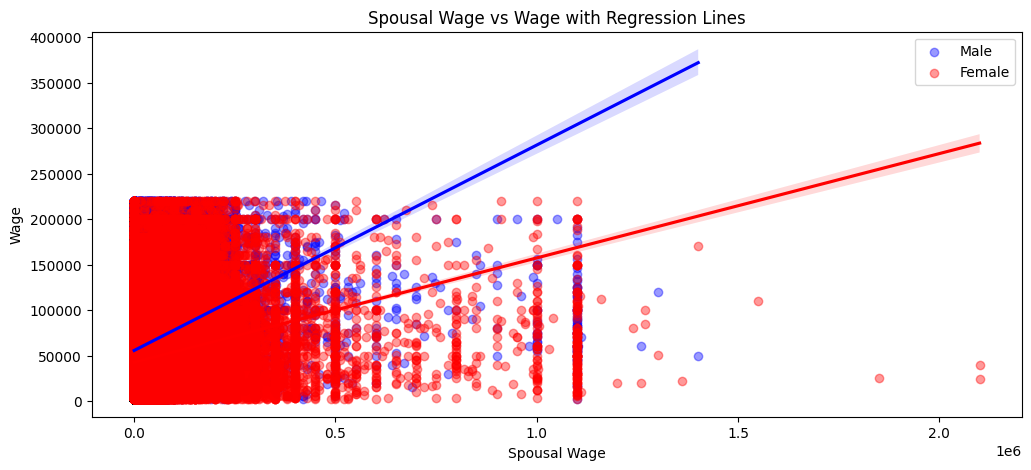

In [ ]:
plt.figure(figsize=(12,5))




# Male data with regression line
sns.regplot(
    x=X_m["INCWAGE_SP"], y= np.exp(y_m),
    scatter_kws={"alpha":0.4, "color":"blue"},
    line_kws={"color":"blue"},
    label="Male"
)

# Female data with regression line
sns.regplot(
    x=X_f["INCWAGE_SP"], y= np.exp(y_f),
    scatter_kws={"alpha":0.4, "color":"red"},
    line_kws={"color":"red"},
    label="Female"
)

plt.xlabel("Spousal Wage")
plt.ylabel("Wage")
plt.title("Spousal Wage vs Wage with Regression Lines")
plt.legend()
plt.show()






/tmp/ipython-input-3928656518.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=explained_df.head(topk), x="Explained_Gap", y="Feature", palette="coolwarm")


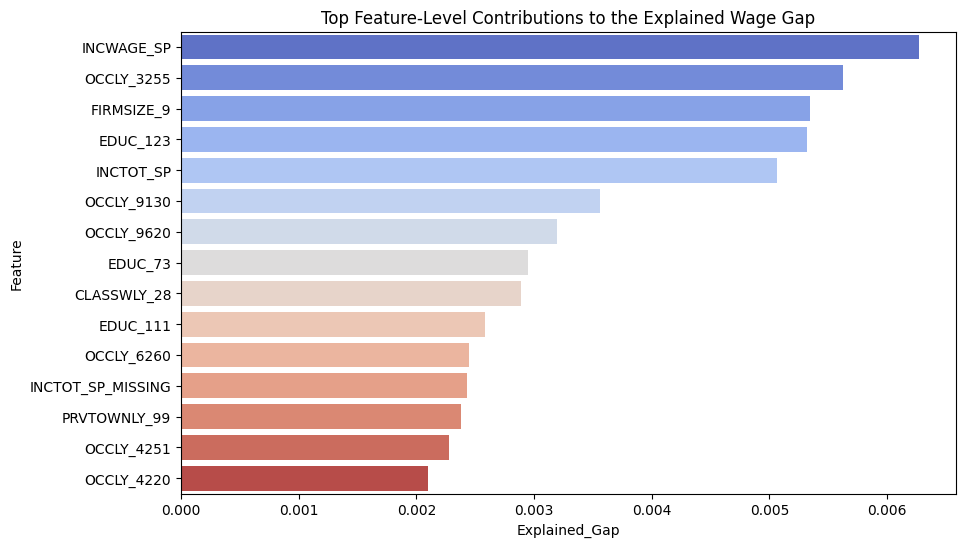

In [ ]:

# --- Visualise explained gap ---
topk = 15
plt.figure(figsize=(10,6))
sns.barplot(data=explained_df.head(topk), x="Explained_Gap", y="Feature", palette="coolwarm")
plt.title("Top Feature-Level Contributions to the Explained Wage Gap")
plt.show()

/tmp/ipython-input-2157984471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=explained_df.tail(bottomk), x="Explained_Gap", y="Feature", palette="coolwarm")


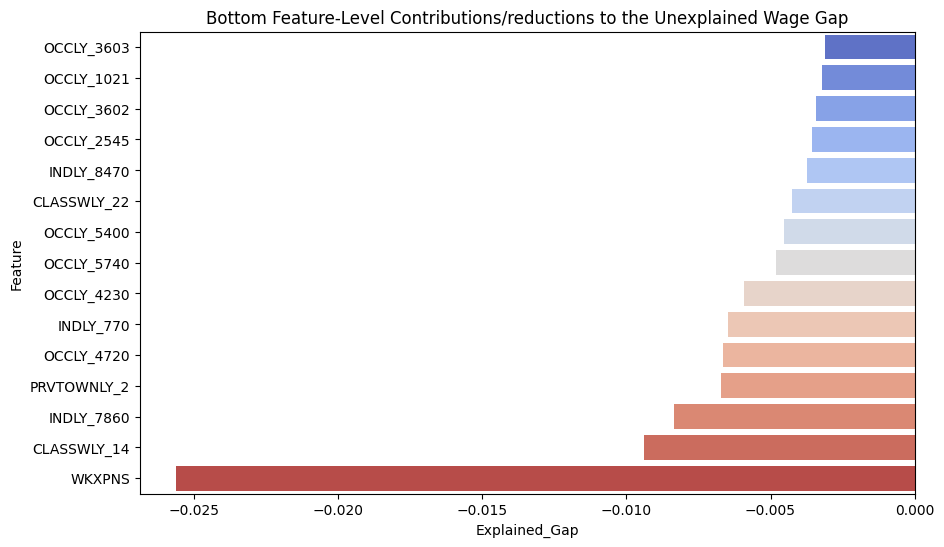

In [ ]:

# --- Visualise features which reduced the explained gap ---
bottomk = 15
plt.figure(figsize=(10,6))
sns.barplot(data=explained_df.tail(bottomk), x="Explained_Gap", y="Feature", palette="coolwarm")
plt.title("Bottom Feature-Level Contributions/reductions to the Unexplained Wage Gap")
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Standardize X first (use scaler_m fit on male and scaler_f on female ideally)
# Here use standardized X_all
nn = NearestNeighbors(n_neighbors=1).fit(pd.DataFrame(scaler_m.transform(X_m),columns=X_m.columns,index = X_m.index ))     # male X only
dist, idx = nn.kneighbors(pd.DataFrame(scaler_m.transform(X_f),columns=X_f.columns,index = X_f.index ))  # distances from each female to closest male
# dist is (n_fem,1)
threshold = np.percentile(dist, 95)  # e.g., top 5% distances flagged
flags = (dist.flatten() > threshold)


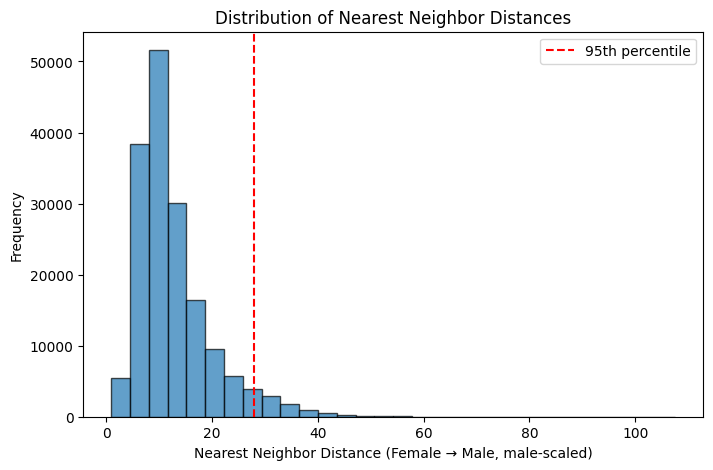

In [ ]:
import matplotlib.pyplot as plt


# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(dist, bins=30, edgecolor="k", alpha=0.7)
plt.axvline(np.percentile(dist, 95), color="red", linestyle="--", label="95th percentile")
plt.xlabel("Nearest Neighbor Distance (Female → Male, male-scaled)")
plt.ylabel("Frequency")
plt.title("Distribution of Nearest Neighbor Distances")
plt.legend()
plt.show()


In [ ]:
print(np.percentile(dist,50))

10.709984133787316


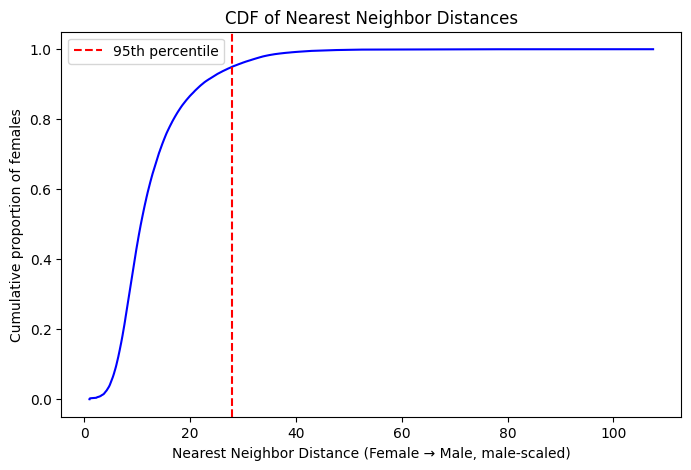

In [ ]:
# Flatten your distances array (female → male)
distances = dist.flatten()

# Sort for CDF
sorted_dist = np.sort(distances)
cdf = np.arange(1, len(sorted_dist)+1) / len(sorted_dist)

# Plot CDF
plt.figure(figsize=(8,5))
plt.plot(sorted_dist, cdf, color="blue")
plt.axvline(np.percentile(distances, 95), color="red", linestyle="--", label="95th percentile")
plt.xlabel("Nearest Neighbor Distance (Female → Male, male-scaled)")
plt.ylabel("Cumulative proportion of females")
plt.title("CDF of Nearest Neighbor Distances")
plt.legend()
plt.show()

In [ ]:
distances = dist.flatten()

for q in [50, 80, 90, 95, 99]:
    val = np.percentile(distances, q)
    print(f"{q}th percentile distance: {val:.2f}")

50th percentile distance: 10.71
80th percentile distance: 16.89
90th percentile distance: 22.28
95th percentile distance: 27.99
99th percentile distance: 38.34


In [ ]:
count = 0

for i in flags:
  if i == True:
    count = count + 1
  else:
    count = count + 0

print((count/len(flags))*100)


5.000089223576438


EDUC_111 is the dummy for a bachelors degree indicating that women get less returns from a bachelors degree relative to men.

In [ ]:
id(scaler_m) == id(scaler_f)

False

In [ ]:
from xgboost import XGBRegressor

# Train female model with GPU support
model_f = XGBRegressor(
    **param_f,
    n_estimators = 20000,
    early_stopping_rounds=200,# optional, but ensures inference also uses GPU
    random_state=1
)

model_f.fit(
    X_f_train_scaled, y_f_train,
    eval_set=[(X_f_test_scaled, y_f_test)],
    verbose=True
)

# Train male model with GPU support
model_m = XGBRegressor(
    **param_m,
    n_estimators = 5000,
    early_stopping_rounds=200,
    random_state=1
)
model_m.fit(
    X_m_train_scaled, y_m_train,
    eval_set=[(X_m_test_scaled, y_m_test)],
    verbose=True
)

Streaming output truncated to the last 5000 lines.
[9849]	validation_0-rmse:0.52953
[9850]	validation_0-rmse:0.52953
[9851]	validation_0-rmse:0.52952
[9852]	validation_0-rmse:0.52953
[9853]	validation_0-rmse:0.52953
[9854]	validation_0-rmse:0.52953
[9855]	validation_0-rmse:0.52952
[9856]	validation_0-rmse:0.52952
[9857]	validation_0-rmse:0.52952
[9858]	validation_0-rmse:0.52953
[9859]	validation_0-rmse:0.52953
[9860]	validation_0-rmse:0.52953
[9861]	validation_0-rmse:0.52953
[9862]	validation_0-rmse:0.52953
[9863]	validation_0-rmse:0.52953
[9864]	validation_0-rmse:0.52953
[9865]	validation_0-rmse:0.52953
[9866]	validation_0-rmse:0.52953
[9867]	validation_0-rmse:0.52952
[9868]	validation_0-rmse:0.52952
[9869]	validation_0-rmse:0.52952
[9870]	validation_0-rmse:0.52952
[9871]	validation_0-rmse:0.52953
[9872]	validation_0-rmse:0.52953
[9873]	validation_0-rmse:0.52953
[9874]	validation_0-rmse:0.52953
[9875]	validation_0-rmse:0.52953
[9876]	validation_0-rmse:0.52953
[9877]	validation_0-rmse:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device='cuda', early_stopping_rounds=200,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=5000,
             n_jobs=None, num_parallel_tree=None, ...)

AttributeError: 'PartialDependenceDisplay' object has no attribute 'pd_lines_'

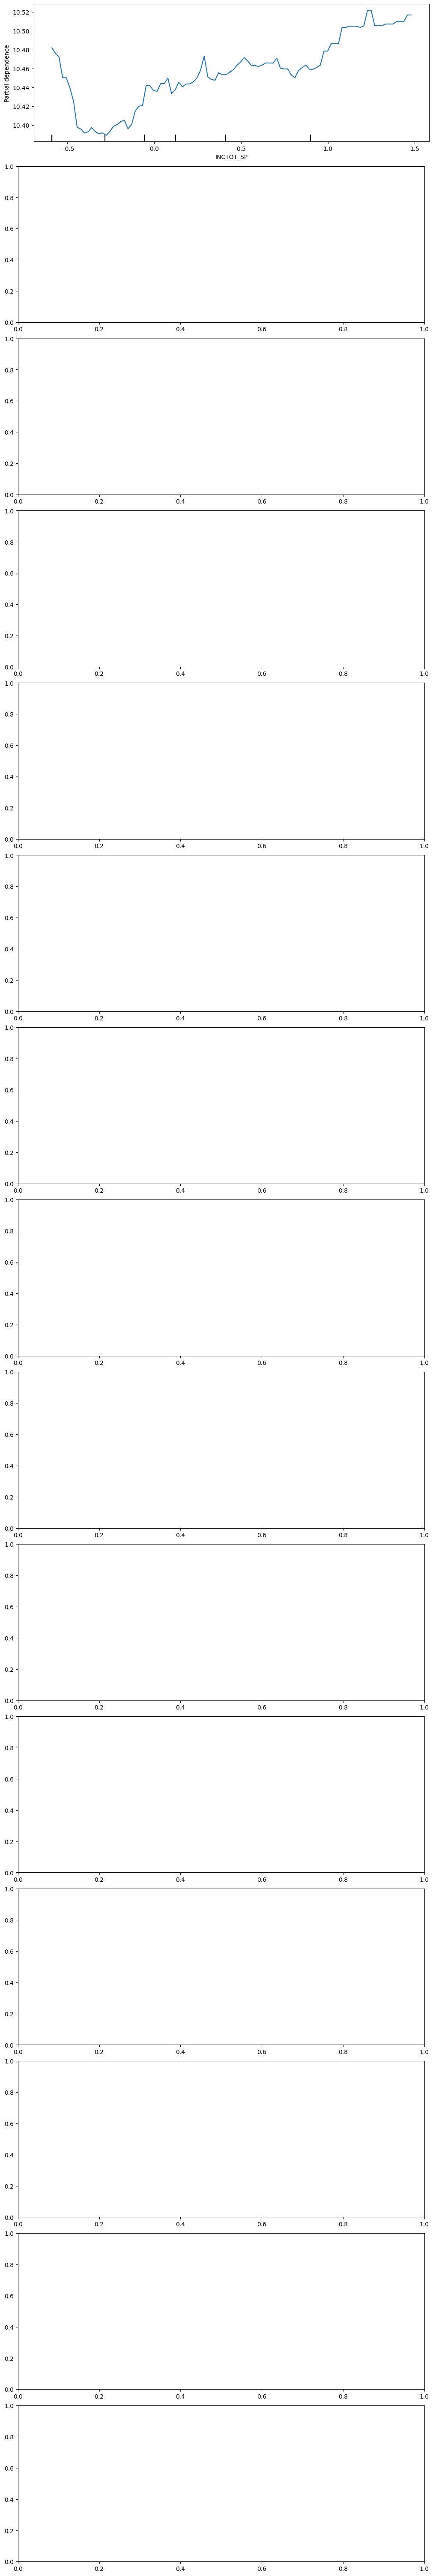

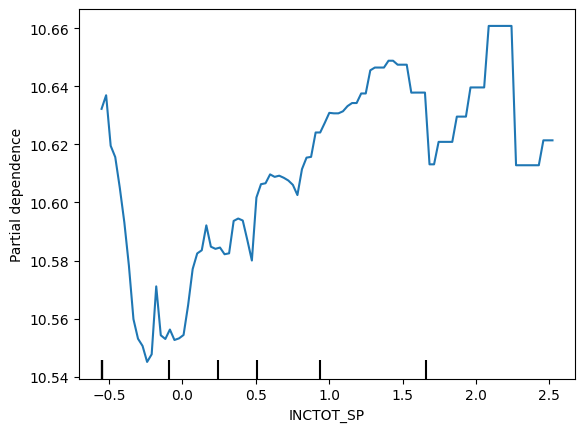

In [ ]:
# ---- PDP for top-k unexplained features (sklearn-compatible, XGBRegressor) ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Inputs assumed available:
#   model_f : XGBRegressor fitted on female data
#   model_m : XGBRegressor fitted on male data
#   scaler_f, scaler_m : StandardScaler (or similar) fit to female/male features respectively
#   X_f : pandas DataFrame of female features (unscaled, original columns)
#   unexplained_df : DataFrame with column "Feature" listing feature names
#   topk : int

# 1) pick top features by unexplained gap
features = unexplained_df["Feature"].head(topk).tolist()

# 2) build scaled female data two ways:
#    - for female model, scale with female scaler (actual female returns)
#    - for male model, scale with male scaler (counterfactual “male lens” on females)
X_f_scaled_f = pd.DataFrame(scaler_f.transform(X_f), columns=X_f.columns, index=X_f.index)
X_f_scaled_m = pd.DataFrame(scaler_m.transform(X_f), columns=X_f.columns, index=X_f.index)


# 4) make axes
fig, ax = plt.subplots(len(features), 1, figsize=(10, 4*len(features)), constrained_layout=True)
if len(features) == 1:
    ax = [ax]

# 5) plot PDP per feature
for i, f in enumerate(features):
    # ✅ FEMALE MODEL: use from_estimator directly on the subplot axis
    disp_f = PartialDependenceDisplay.from_estimator(
        model_f,
        pd.DataFrame(scaler_f.transform(X_f), columns=X_f.columns, index=X_f.index),
        [f],
        ax=ax[i]
    )

    # ✅ MALE MODEL: DO NOT reuse ax[i], let sklearn create its own fig
    disp_m = PartialDependenceDisplay.from_estimator(
        model_m,
        pd.DataFrame(scaler_m.transform(X_f), columns=X_f.columns, index=X_f.index),
        [f]
    )

    # ✅ Then overlay the male PDP line manually on the same ax[i]
    ax[i].plot(
        disp_m.pd_lines_[0][0],  # x-values
        disp_m.pd_results[0][0], # y-values
        color="red",
        label="Male model"
    )

    ax[i].set_title(f"PDP of Feature {f} (Blue = Female if paid like men, Red = Females)")
    ax[i].legend()
plt.show()

In [ ]:

Gen_Y = Analysis_df['SEX_Female']
X_Gen = Analysis_df.drop(columns=['SEX_Female', 'log_INCWAGE'])



In [ ]:
from sklearn.linear_model import LogisticRegression

ps_model = LogisticRegression(max_iter=5000)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_Gen)


ps_model.fit(X_scaled, Gen_Y)  # treatment = 1 if female, 0 if male
pscore = ps_model.predict_proba(X_scaled)[:,1]


In [ ]:
# Add propensity scores as a new column
Analysis_df['pscore'] = pscore

# Now you can separate by group
ps_female = Analysis_df.loc[Analysis_df['SEX_Female'] == 1, "pscore"]
ps_male   = Analysis_df.loc[Analysis_df['SEX_Female'] == 0, "pscore"]


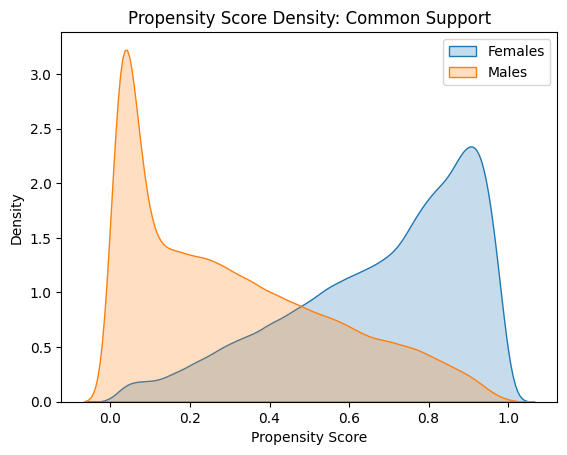

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(ps_female, label="Females", fill=True)
sns.kdeplot(ps_male, label="Males", fill=True)
plt.xlabel("Propensity Score")
plt.ylabel("Density")
plt.title("Propensity Score Density: Common Support")
plt.legend()
plt.show()

In [ ]:
ps_female = Analysis_df.loc[Analysis_df['SEX_Female'] == 1, "pscore"]
ps_male   = Analysis_df.loc[Analysis_df['SEX_Female'] == 0, "pscore"]

# Define overlapping range

q_low = max(ps_female.quantile(0.01), ps_male.quantile(0.01))
q_high = min(ps_female.quantile(0.99), ps_male.quantile(0.99))
print(f"Practical common support: [{q_low:.3f}, {q_high:.3f}]")

Practical common support: [0.074, 0.908]


In [ ]:
overlap_min = 0.2
overlap_max = 0.8


In [ ]:
# Females outside support
females_outside = ((ps_female < q_low) | (ps_female > q_high)).sum()
# Males outside support
males_outside   = ((ps_male < q_low) | (ps_male > q_high)).sum()

print(f"Females outside support: {females_outside}")
print(f"Males outside support: {males_outside}")


Females outside support: 28473
Males outside support: 45316


In [ ]:


print(f"Percent of females outside support: {females_outside / len(ps_female) * 100:.7f}%")
print(f"Percent of males outside support: {males_outside / len(ps_male) * 100:.2f}%")


Percent of females outside support: 16.9364193%
Percent of males outside support: 25.51%


In [ ]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',   # 👈 USE GPU HERE
    device = 'cuda', # Optional: use GPU for prediction too
    gpu_id=0,                  # Optional if you have multiple GPUs
    verbosity=1
)

param_grid = {
    'n_estimators': [1000, 2000, 5000, 10000],
    'max_depth': [3, 5, 7, 12],
    'learning_rate': [0.001,0.01, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [10,80,800],
    'reg_alpha': [0]
}




random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=150,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=1   # critical!
)


random_search.fit(X_m_train_scaled, y_m_train)
